In [2]:
"""Bayesian way"""
import arviz as az
import stan
import nest_asyncio
nest_asyncio.apply()

"""Basic ones"""
import polars as pl
from plotnine import *
import matplotlib.pyplot as plt
plt.show()  # for display figures after ggplot
# plt.rcParams['axes.grid'] = True
import numpy as np
import seaborn as sns
import pandas
import statsmodels.api as sm
from datetime import datetime

import warnings
warnings.simplefilter("ignore")

In [3]:
df_hrv_freq = pl.read_csv("../../data/HRV/freqency_domain.csv")
df_hrv_freq = df_hrv_freq.with_columns((pl.col("LF") / pl.col("HF")).alias("LFHF"))
df_hrv_timenon = pl.read_csv("../../data/HRV/time_nonlinear_domain.csv")
df_hrv_timenon = df_hrv_timenon.drop("mean_RRI")

In [4]:
(df_hrv_timenon["date"] != df_hrv_freq["date"]).sum()

0

In [5]:
df_hrv = df_hrv_freq.join(df_hrv_timenon, on="date")
del df_hrv_timenon, df_hrv_freq

<Axes: >

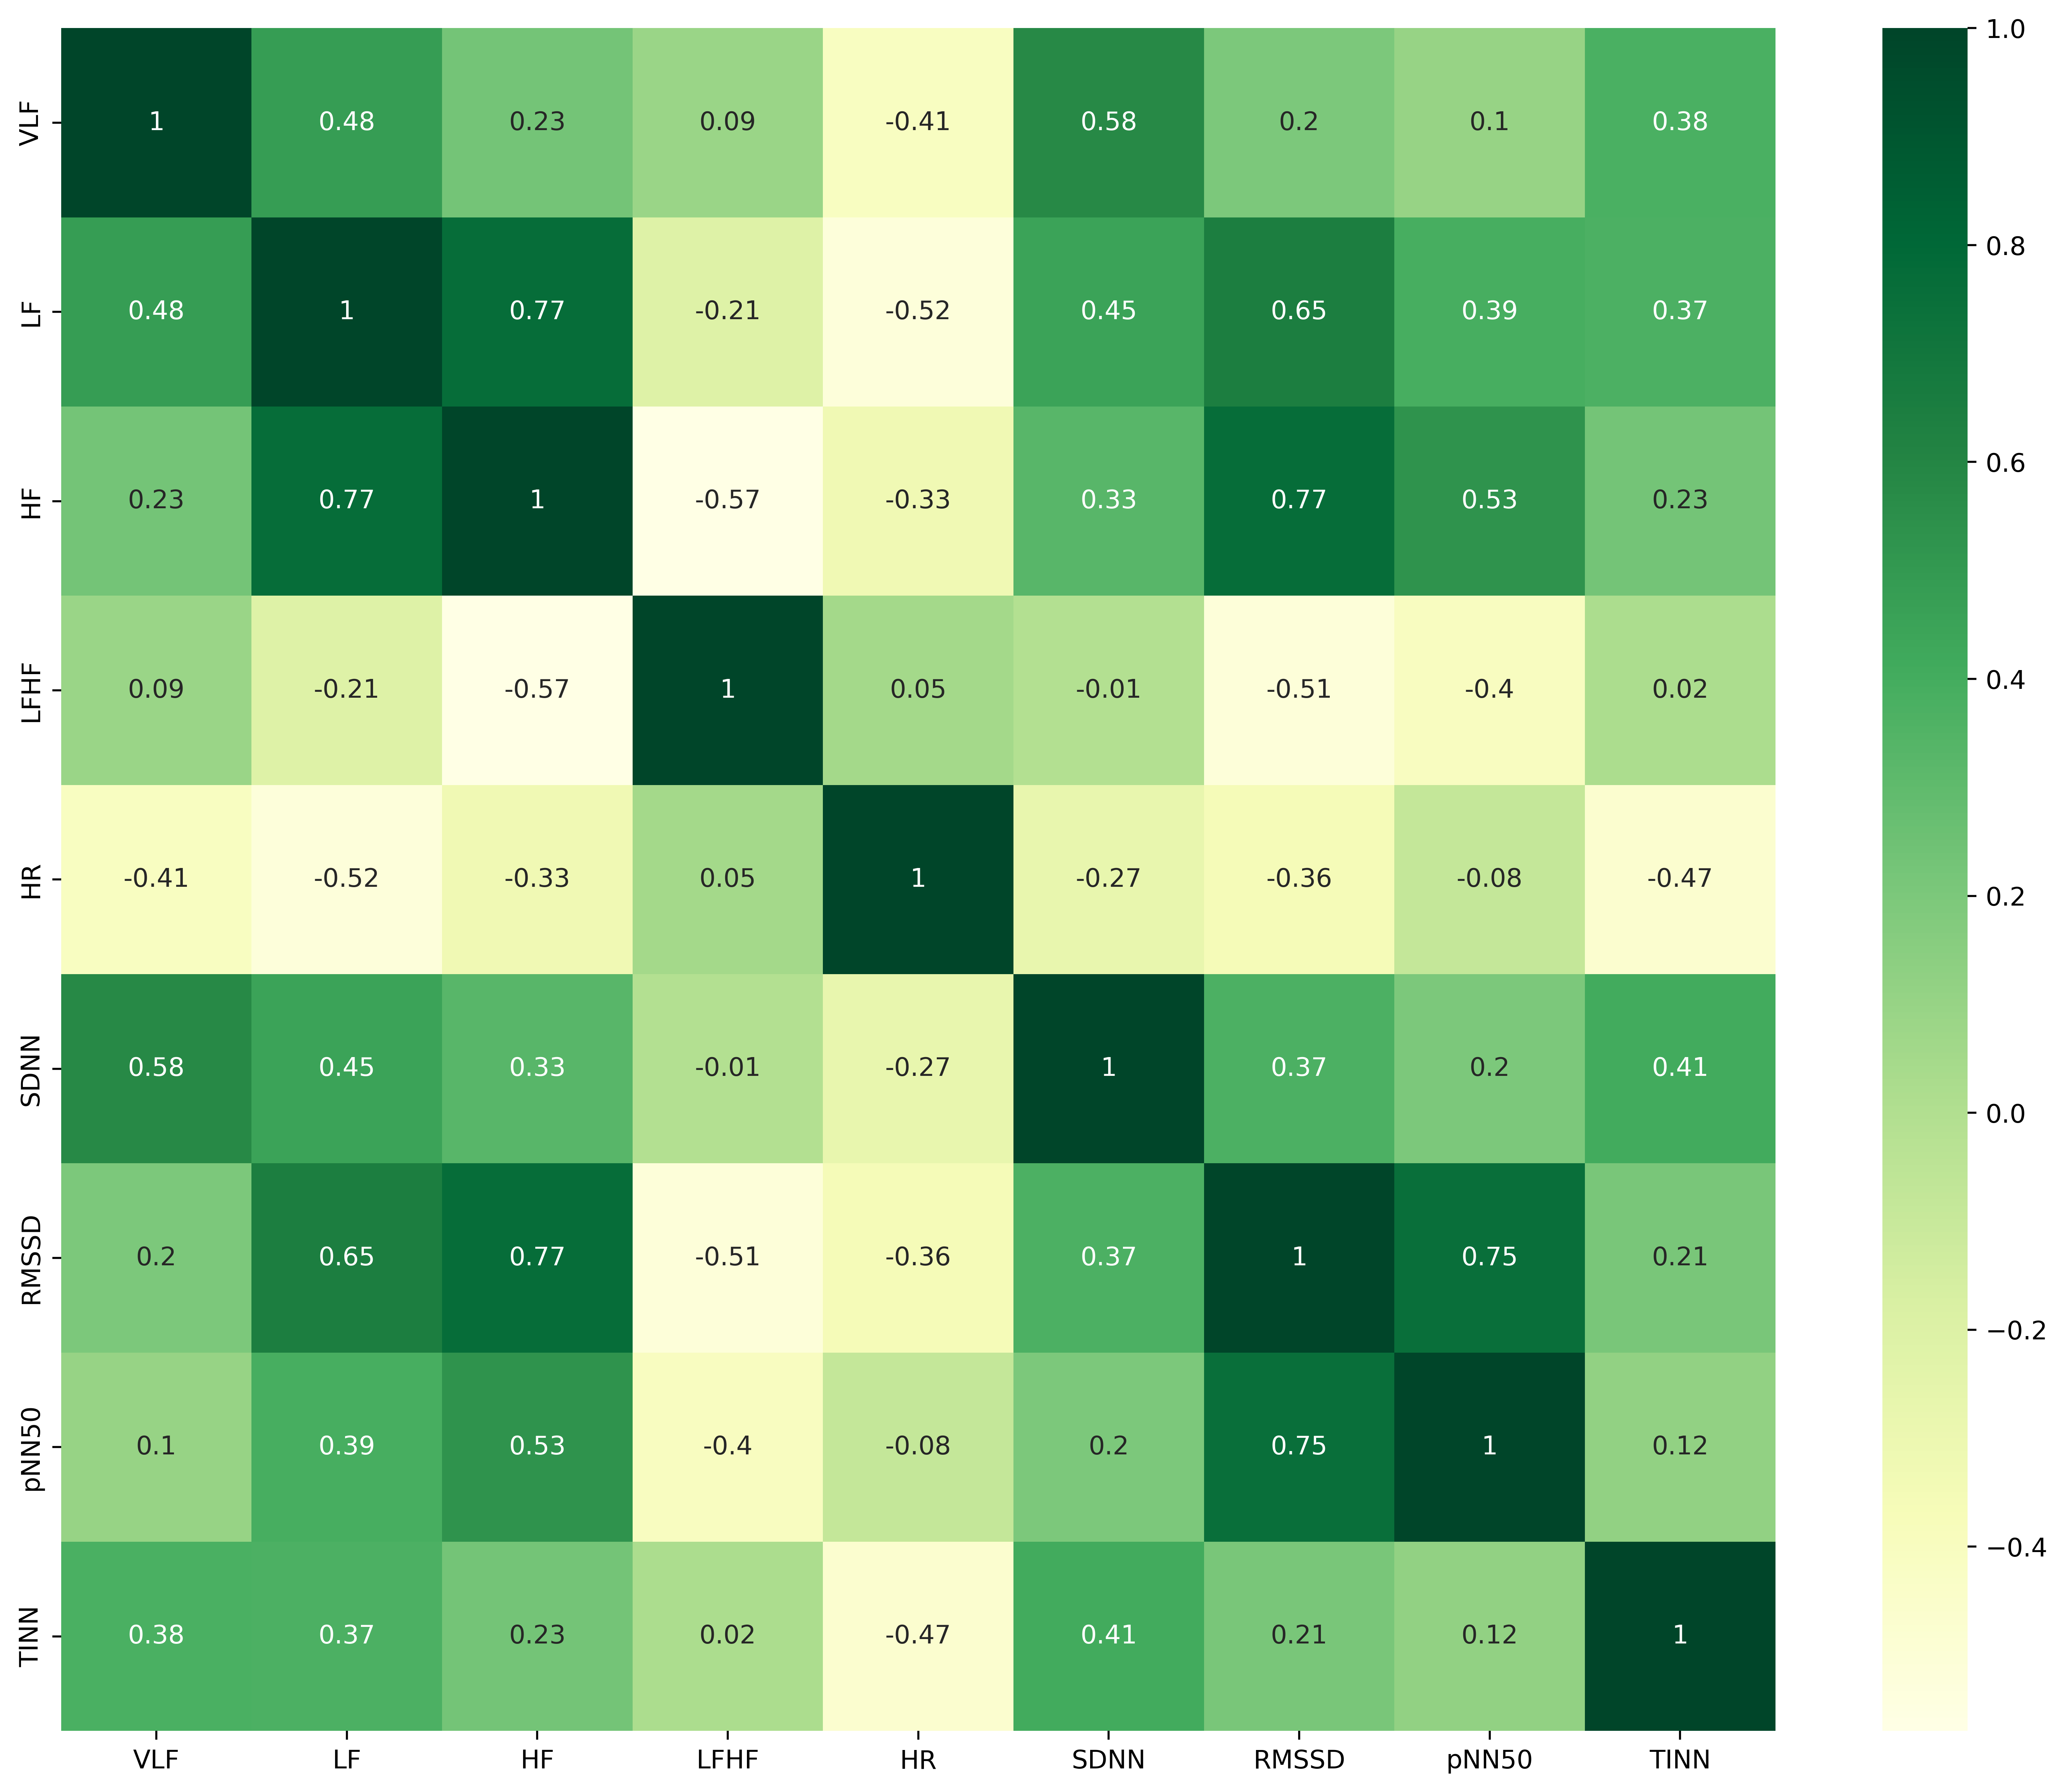

In [15]:
plt.figure(figsize=(15, 12), dpi=500)
plt.tight_layout()
sns.heatmap(df_hrv.drop(["date", "CD", "ApEn", "SD1","SD2","SD1SD2"]).to_pandas().corr().round(2), cmap="YlGn", annot=True)
# sns.heatmap(df_hrv.drop(["date"]).to_pandas().corr().round(2), cmap="YlGn", annot=True)

# plt.savefig(fname="../../fig/heatmap.png")

In [7]:
df_weather = pl.read_csv("../../data/weather/weather.csv")
str_col = [col for col, dtype in df_weather.schema.items() if dtype == pl.Utf8]

<Axes: >

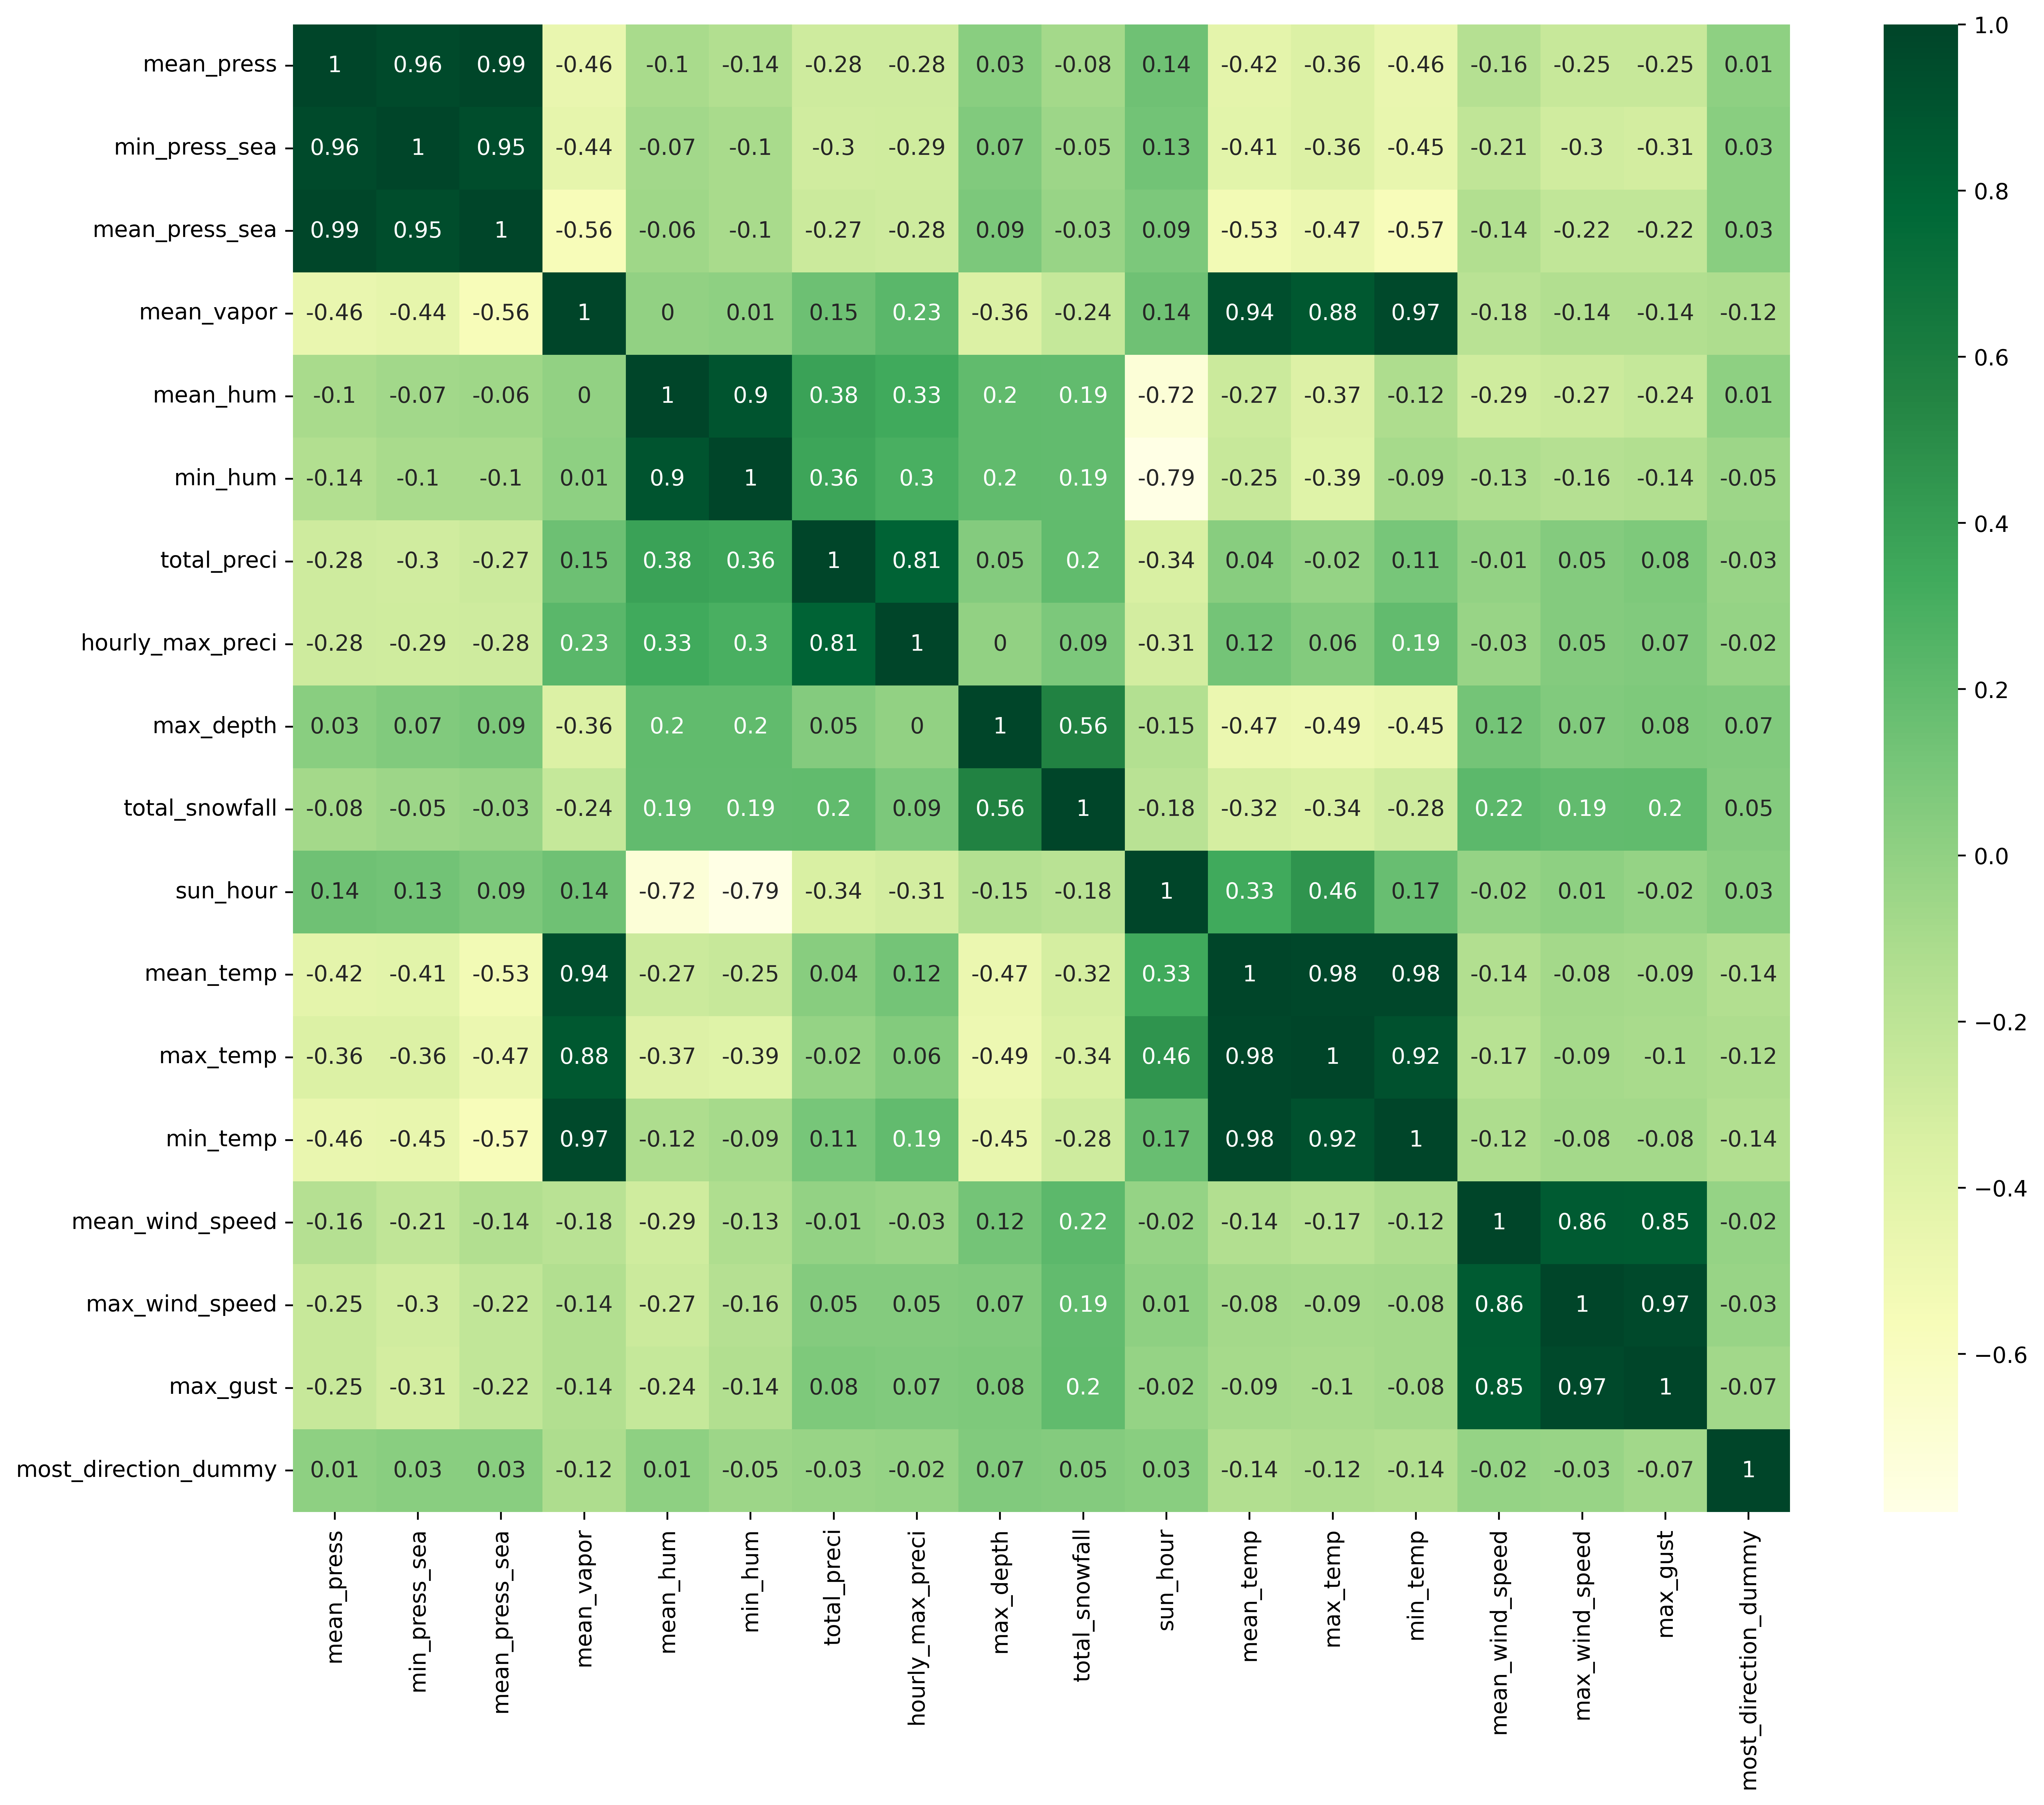

In [18]:
plt.figure(figsize=(15, 12), dpi=500)
plt.tight_layout()
# sns.heatmap(df_hrv.drop(["date", "SD1","SD2","SD1SD2"]).to_pandas().corr().round(2), cmap="YlGn", annot=True)
sns.heatmap(df_weather.drop(str_col).to_pandas().corr().round(2), cmap="YlGn", annot=True)

# plt.savefig(fname="../../fig/weather_heatmap.png")